## Analysis
In this analysis, I am trying to understand the data here(2016 School explorer file) provided by PASSNYC and hope to build the analysis further by using some other useful datasets as well.

Background Reading https://www.nytimes.com/2018/06/21/nyregion/what-is-the-shsat-exam-and-why-does-it-matter.html

# Loading the Libraries and the Data:

In [39]:
# Click the button to toggle all the code cells

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
import plotly.plotly as py

In [13]:
pd.set_option('display.max_columns', None)  
df = pd.read_csv('./2016 School Explorer.csv')
shsat = pd.read_csv('./D5 SHSAT Registrations and Testers.csv')
safety = pd.read_csv('./2010-2016-school-safety-report.csv')

In [16]:
df.head(2)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

#### There are 1272 schools in the data set 'df' 

In [28]:
# clean some data
# Create a function to convert the percentage to a decimal 
def p2f(x):
    return float(x.strip('%'))/100

df['Percent of Students Chronically Absent']=df['Percent of Students Chronically Absent'].astype(str).apply(p2f)
df['Rigorous Instruction %'] = df['Rigorous Instruction %'].astype(str).apply(p2f)
df['Collaborative Teachers %'] = df['Collaborative Teachers %'].astype(str).apply(p2f)
df['Supportive Environment %'] = df['Supportive Environment %'].astype(str).apply(p2f)
df['Effective School Leadership %'] = df['Effective School Leadership %'].astype(str).apply(p2f)
df['Strong Family-Community Ties %'] = df['Strong Family-Community Ties %'].astype(str).apply(p2f)
df['Trust %'] = df['Trust %'].astype(str).apply(p2f)
df['Student Attendance Rate'] = df['Student Attendance Rate'].astype(str).apply(p2f)

In [29]:
df.head(2)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

## Map of New York

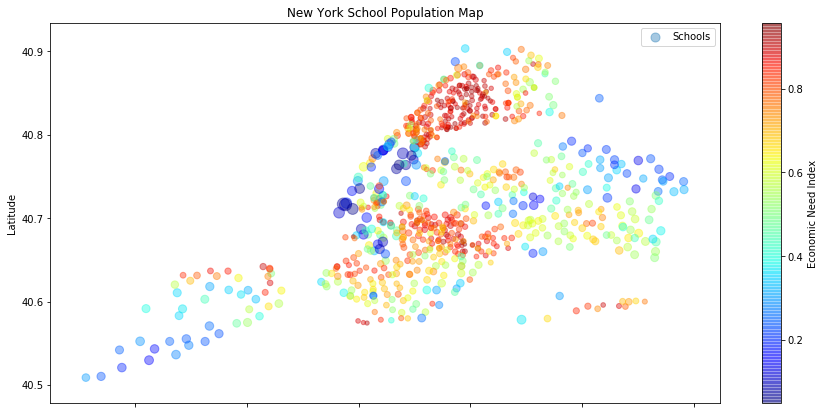

In [30]:
# Static Version
df.plot(kind="scatter", x="Longitude", y="Latitude",
    s=df['School Income Estimate']/1210, c="Economic Need Index", cmap=plt.get_cmap("jet"),
        label='Schools', title='New York School Population Map',colorbar=True, alpha=0.4, figsize=(15,7))
plt.legend()
plt.show()

In [31]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Economic Need Index"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York School Population (Economic Need Index)',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

### Map of Black/Hispanic Percentage 

- conclusion: Upper New York contains most of the Schools with Hispanics

Majority of the hispanic population are living in Upper New York. Again, notice how there are a few Hispanics in Central New York while there are a majority of Blacks in Central New York.

In [36]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Hispanic"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Hispanic Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

- Central New York contains most of the Schools with Blacks

Majority of the black population are living in Central New York. If you compare this to the Hispanic Population, they are totally isolated from each other.

In [37]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["School Name"],
        'mode': 'markers',
        'marker': {
            'color': df["Percent Black"],
            'size': df["School Income Estimate"]/4500,
            'showscale': True,
            'colorscale':'Portland'
        }
    }
]

layout= go.Layout(
    title= 'New York Black Student Ratio Of School',
    xaxis= dict(
        title= 'Longitude'
    ),
    yaxis=dict(
        title='Latitude'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter_hover_labels')

##### Black/Hispanic population comparison

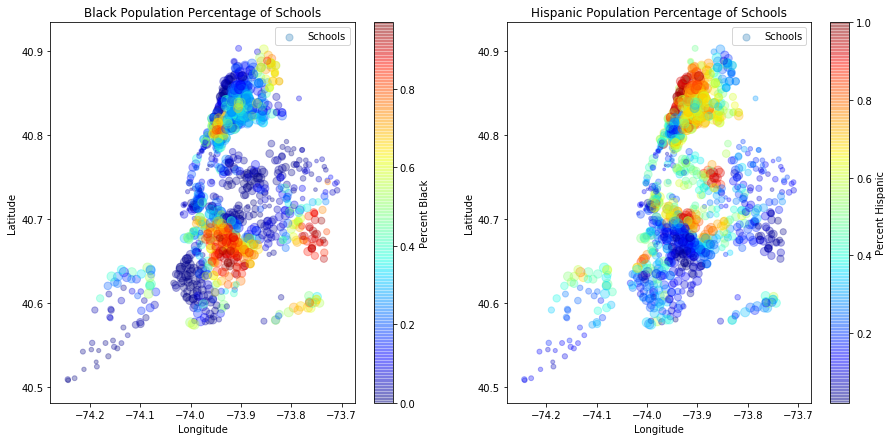

In [38]:
# Static Figure
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Black", cmap=plt.get_cmap("jet"),label='Schools', title='Black Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,7))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*100, c="Percent Hispanic", cmap=plt.get_cmap("jet"),label='Schools', title='Hispanic Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,7))

plt.legend()
plt.show()

### Asian/White Percentage

- The **Asian** population are mostly living in Central New York.

- The **White** Population has a very noticeable cluster near the edge and lower parts of New York.

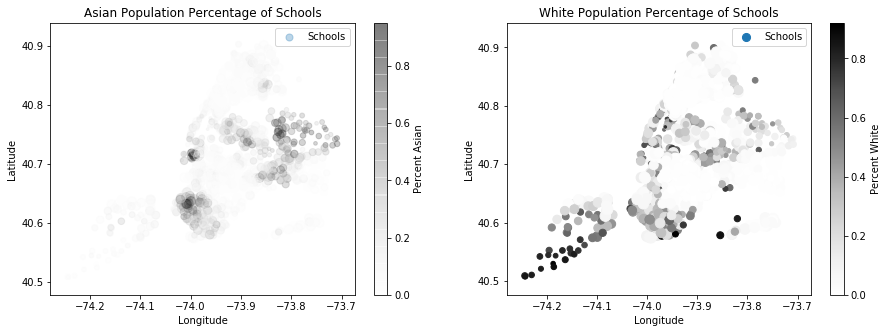

In [40]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[0],
    s=df['Economic Need Index']*100, c="Percent Asian", label='Schools', title='Asian Population Percentage of Schools',
    colorbar=True, alpha=0.3, figsize=(15,5))

df.plot(kind="scatter", x="Longitude", y="Latitude", ax=axes[1],
    s=df['Economic Need Index']*130, c="Percent White", label='Schools', title='White Population Percentage of Schools',
    colorbar=True, alpha=1, figsize=(15,5))

plt.legend()
plt.show()

## Community vs Non-Community School Income

#### Community Schools:
- Has higher economic need index
- Average School Income = $38k
- Average % Black/Hispanic = 93% 

#### Non Community Schools:
- Has lower economic need index
- Average School Income = $47k
- Average % Black/Hispanic = 70%

In [43]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby('Community School?')
turnover_Summary[['Economic Need Index', 'School Income Estimate', 'Percent Asian','Percent Black', 'Percent Hispanic', 
                  'Percent White', 'Average ELA Proficiency', 'Average Math Proficiency']].mean()

,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent White,Average ELA Proficiency,Average Math Proficiency
Community School?,,,,,,,,
No,0.660520,49103.195225,0.122232,0.314038,0.404289,0.138462,2.560298,2.706322
Yes,0.853487,29829.246667,0.025921,0.413158,0.525526,0.024211,2.137067,2.100000


## School Income VS Economic Need Index
There is definitely a **negative correlation** between School Income and their Economic Need Index. It makes sense:

- The less income you make the higher economic need index you'll get.
- The more income you make the less economic need index you'll get.

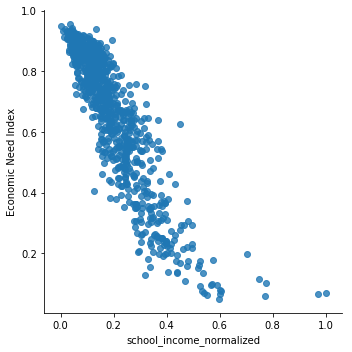

In [56]:
x=df['School Income Estimate']
df['school_income_normalized']=(x-min(x))/(max(x)-min(x))
sns.lmplot(x='school_income_normalized', y='Economic Need Index', data=df,
           fit_reg=False) # No regression line